#[결측값-이상치 처리](https://)



---



#[데이터 정제(Data Cleansing)란?](https://)
- [데이터 분석 목적에 부합하는 데이터 품질을 확보하기 위한 일체의 데이터 작업](https://)
>- 데이터 분석 작업의 약 80% 수준이 데이터 수집 및 전처리 작업임



---



#[데이터 전처리 과정](https://)
- 주어진 데이터에 어떠한 문제가 있는지 확인
>- 데이터 분석 결과에 직접적인 성능 차이를 야기하므로 반드시 수행 필요
>- 잘못 측정되고 불필요한 데이터를 제거할 수 있어야 함
- data cleansing의 주요 5단계
>- 1. 데이터 베이스 정의
>- 2. 불량 데이터의 원인 찾기
>- 3. 우선순위 매기기
>- 4. 데이터 베이스에 들어오는 불량 데이터 막기
>- 5. 불량 데이터 제거
- 데이터 오류 확인
>- 결측치(Missing Value)
>- 노이즈(Noise)
>- 이상값(Outlier)
>>- [노이즈와 이상값은 무작정 지우고 진행할 것이 아닌, 적합시켜야 하는 귀중한 데이터](https://)



---



#[결측 값(Missing value)](https://)
- 값이 기록되지 않았거나 관측되지 않은 경우, 데이터에 저장되는 값
>- [NA : Not Available(유효하지 않은)](https://)
>- [NaN : Not a Number(숫자가 아닌)](https://)
>- [ Null : 아무것도 존재하지 않음을 의미](https://)

In [ ]:
#결측값 확인 - isnull(), isnull().sum()
import pandas as pd
df = pd.DataFrame({"v1":[None,200,None,400], "v2":[None,200,100,250], "v3":[40,60,500,None]})
df

,v1,v2,v3
0,NaN,NaN,40.0
1,200.0,200.0,60.0
2,NaN,100.0,500.0
3,400.0,250.0,NaN


In [ ]:
df.isnull()

,v1,v2,v3
0,True,True,False
1,False,False,False
2,True,False,False
3,False,False,True


In [ ]:
df.isnull().sum()

,0
v1,2
v2,1
v3,1


In [ ]:
df[df.v1.isnull()]

,v1,v2,v3
0,NaN,NaN,40.0
2,NaN,100.0,500.0




---



#[결측 값이 분석 결과에 미치는 영향](https://)
- 1. 표본의 규모가 감소되어 검정력이 감소된다.
- 2. 표본의 대표성이 낮아져 분석 결과에 편향(Bias)을 가져온다.
- 3. 결측으로 인한 실제 문제의 발생을 식별하기 어렵다.



---



#[결측치 종류](https://)
- [MCAR(완전 무작위 결측)](https://)
>- 결측치가 완전히 random으로 발생
>- 특정 변수와 연관성이 없음
>- 변수의 관측치와 결측치에 모두 독립
>- 결측치 대체 전후의 분포 변화 없음
>- 관측치가 많다면 지우는 것도 방법임
>>- [예) 센서 오류, TCP통신 중 데이터 누락](https://)
- [MAR(무작위 결측)](https://)
>- 결측치는 random으로 발생
>- 특정 변수값에 따른 조건부 발생 가능
>- 다양한 결측치 대체 기법으로 추정 가능
>>- [예) 해시계(밤 되면 측정 불가) -> 원인이 분명히 존재!](https://)
- [MNAR(비 무작위 결측)](https://)
>- 결측치는 임의로 발생하지 않음
>- 관측값과 결측값 모두에 영향을 받음
>- 결측치 원인을 특정 짓기 어렵고, 단순 결측치 대체법 만으로는 해결하기 어려움
>- 분명한 결측 사유가 존재하지만, 비정상적이며 그 원인을 찾기가 쉽지 않은 경우
>>- [예) 응답자들이 고의로 자신을 감추고 사실과 다른 응답을 하는 경우](https://)



---



#[결측치 대체 방법](https://)
- 단순 대치법((Imputation))
>- 결측치를 대체하는 값으로 기존 데이터를 수정하는 방법. 대치법은 여러 하위 유형으로 나눌 수 있dma
>>- 평균 대치법: 결측치를 해당 변수의 평균 값으로 대체
>>- 중앙값 대치법: 결측치를 해당 변수의 중앙값으로 대체
>>- 최빈값 대치법: 결측치를 해당 변수의 최빈값으로 대체
>>- 마지막 관측값 대치법: 결측치를 직전의 관측값으로 대체



---



In [ ]:
#Missing Value Imputation Methods with Implementation using Python
import numpy as np
import pandas as pd

# Creating a sample data
data = {'Score': [25, np.nan, 30, np.nan, 29, 27, 32, 31]}
df = pd.DataFrame(data)

# Mean Imputation
df['Score_Mean'] = df['Score'].fillna(df['Score'].mean())

# Median Imputation
df['Score_Median'] = df['Score'].fillna(df['Score'].median())

# Mode Imputation
df['Score_Mode'] = df['Score'].fillna(df['Score'].mode()[0])

print(df)

   Score  Score_Mean  Score_Median  Score_Mode
0   25.0        25.0          25.0        25.0
1    NaN        29.0          29.5        25.0
2   30.0        30.0          30.0        30.0
3    NaN        29.0          29.5        25.0
4   29.0        29.0          29.0        29.0
5   27.0        27.0          27.0        27.0
6   32.0        32.0          32.0        32.0
7   31.0        31.0          31.0        31.0




---



- [평균 대치법(Average Imputation)](https://)
>- [관측 변수의 평균값으로 결측값을 대체하는 방법](https://)
>- 평균, 중앙값, 최빈값 모두 사용 가능
>- 분석이 간편하고 결측치 포함 관측치를 지우지 않아 좋으나 통계량의 변량을 과소 추정하는 문제 발생 -> 데이터가 왜곡 될 수 있음

In [ ]:
# 평균 대치법 예시 코드
import pandas as pd

# 결측치가 있는 데이터프레임 예시
df = pd.DataFrame({'A': [1, 2, None, 4],
                   'B': [5, None, 7, 8]})

# 열의 평균값 계산
mean_A = df['A'].mean()
mean_B = df['B'].mean()

# 결측치를 평균값으로 대체
df['A'].fillna(mean_A, inplace=True)
df['B'].fillna(mean_B, inplace=True)
df

<ipython-input-6-d4c13f723aa3>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['A'].fillna(mean_A, inplace=True)
<ipython-input-6-d4c13f723aa3>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method

,A,B
0,1.000000,5.000000
1,2.000000,6.666667
2,2.333333,7.000000
3,4.000000,8.000000




---



- [완전 분석법(Complete Analysis)](https://)
>- [결측치가 포함된 특정 자료를 모두 무시하고 완전하게 관측된 자료만으로 데이터 분석에 필요한 데이터 셋을 구성하는 방법](https://)
>- 분석이 간편하지만, 관측치 부족 시에는 분석 기법에 대한 근거 미약



---



In [ ]:
# 완전 분석법 예시 코드
import pandas as pd

# 결측치가 있는 데이터프레임 예시
df = pd.DataFrame({'A': [1, 2, None, 4],
                   'B': [5, None, 7, 8]})

# 결측치가 있는 행 제거
df.dropna(inplace=True)

# 결측치가 있는 열 제거
df.dropna(axis=1, inplace=True)
df

,A,B
0,1.0,5.0
3,4.0,8.0




---



- [단순 확률 대치법(Single Stochastic Imputation)](https://)
>- [평균 대치법에서 추정량 표준오차의 과소 추정문제를 보완하고자 고완된 방법
알고 있는 정보나 주어진 데이터를 기반으로 사건에 대한 확률 추정, 값을 부여한 후 대치하는 방법](https://)
>- 단순 삭제나 평균 대치법보다 정확도가 높으나, 모든 상황에 적합하다고 볼 순 없음

In [ ]:
# 단순 확률 대치법 예시 코드
import pandas as pd
import numpy as np

# 결측치가 있는 데이터프레임 예시
df = pd.DataFrame({'A': [1, 2, np.nan, 4], #파이썬의 NumPy 모듈에서 사용되는 결측값을 나타내는 기호로, Not a Number의 약자
                   'B': [5, np.nan, 7, 8],
                   'C': [np.nan, 2, 6, 8]})

# 각 열의 결측치 개수 확인
missing_counts = df.isnull().sum()
print(missing_counts)

# 각 열의 결측치를 해당 열의 랜덤 데이터로 대체
for col in df.columns:
    if missing_counts[col] > 0:
        col_data = df[col].dropna()  # 결측치가 아닌 데이터 추출
        fill_values = np.random.choice(col_data, size=missing_counts[col])  # 랜덤으로 대체값 선택

#레포트!!!!!!
        df[col].fillna(pd.Series(fill_values), inplace=True) #fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드
#       df[col].fillna(pd.Series(fill_values, index=df.index), inplace=True) #fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드
        #https://stackoverflow.com/questions/42382263/valueerror-length-of-values-does-not-match-length-of-index-pandas-dataframe-u
        #https://rfriend.tistory.com/634

df

A    1
B    1
C    1
dtype: int64


<ipython-input-8-38142d166c3d>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(pd.Series(fill_values), inplace=True) #fillna 메서드는 DataFrame에서 결측값을 원하는 값으로 변경하는 메서드


,A,B,C
0,1.0,5.0,6.0
1,2.0,NaN,2.0
2,NaN,7.0,6.0
3,4.0,8.0,8.0


- [다중 대치법](https://)
>- [N번의 단순 대치법을 반복 수행 - N개의 독립 데이터 셋 만들어 활용](https://)
>- bias가 높고 정확도 성능 부족한 단순 대치법의 한계 극복
>- 대치 적용 > 분석 > 결과 병합 단계 수행
>- 반복적인 예측 과정을 통해 결측치를 추정하므로 결과는 매번 달라질 수 있음

In [ ]:
# 다중 대치법 예시 코드
import pandas as pd
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

from sklearn.impute import SimpleImputer

# 결측치가 있는 데이터프레임 예시
df = pd.DataFrame({'A': [1, 2, None, 4],
                   'B': [5, None, 7, 8],
                   'C': [2, 4, 6, None]})

# 다중 대치법 모델 생성
imputer = SimpleImputer()

# 결측치 대체
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
df

,A,B,C
0,1.0,5.0,2.0
1,2.0,NaN,4.0
2,NaN,7.0,6.0
3,4.0,8.0,NaN




---



#[이상치(Outlier)](https://)
- [보통 관측된 데이터의 범위에서 많이 벗어난 아주 작은 값이나 큰 값](https://)
>- 어떤 의사결정을 하는데 필요한 데이터를 분석 혹은 모델링할 경우, 이러한 이상치가 의사결정에 큰 영향을 미칠 수 있기 때문에 데이터 전처리 과정에서의 적절한 이상치 처리는 필수적임
-‘데이터의 범위에서 많이 벗어난’ 혹은 ‘아주 작은/큰’이라는 것은 정확히 어떤 기준으로 판단할 수 있을까?



---



#[이상치 탐색 방법 - Standard Deviation](https://)
- 데이터의 분포가 정규 분포를 이룰 때, 데이터의 표준 편차를 이용해 이상치를 탐지하는 방법

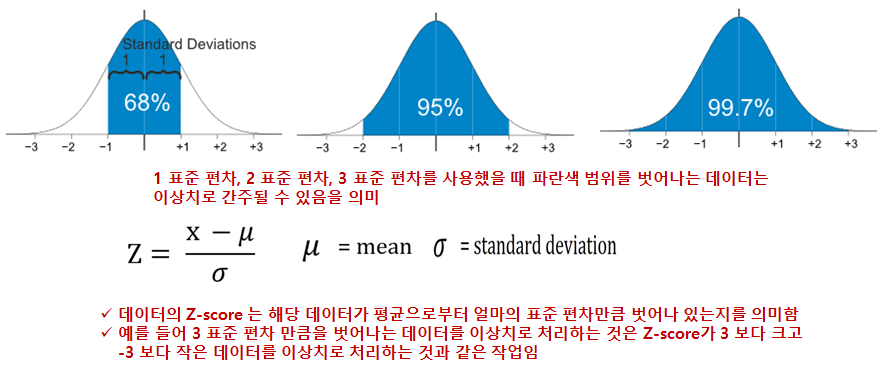



---



#[이상치 탐색 방법 - IQR(Interquartile Range) with Box plots 방법](https://)
- 데이터의 분포가 정규 분포를 이루지 않거나 한 쪽으로 skewed 한 경우, 데이터의 IQR 값을 이용해 이상치를 탐지하는 방법

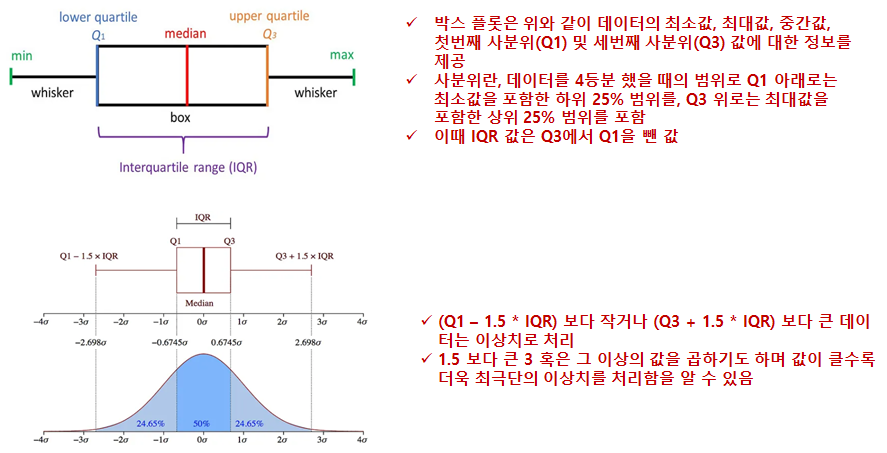

In [ ]:
#이상치 감지 및 제거
#데이터 분석 단계에서 발생한 이상치를 감지해야 하며, 동일한 접근 방식을 목록 및 시리즈 유형 객체에도 사용할 수 있음
#이상치 탐지에 사용되는 데이터 세트 Importing

import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
diabetics = load_diabetes()

# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
print(df_diabetics.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  




---



<Axes: ylabel='bmi'>

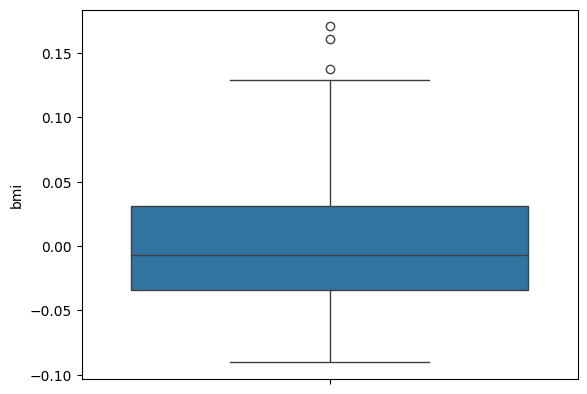

In [ ]:
#상자 그림을 사용하여 이상치 시각화 및 제거
# Box Plot
import seaborn as sns
sns.boxplot(df_diabetics['bmi'])
#10보다 큰 값은 이상치로 작용하는 것을 분명히 볼 수 있음

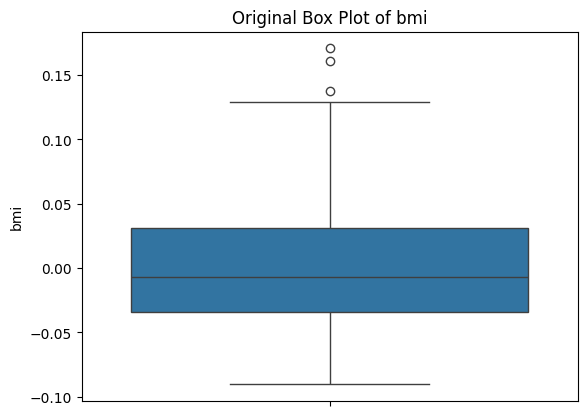

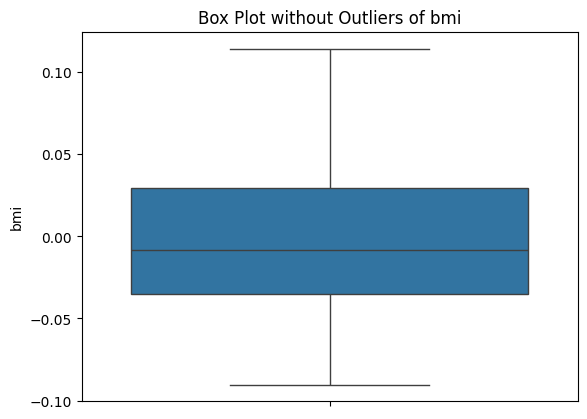

In [ ]:
#import seaborn as sns
#import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

def removal_box_plot(df, column, threshold):
    sns.boxplot(df[column])
    plt.title(f'Original Box Plot of {column}')
    plt.show()

    removed_outliers = df[df[column] <= threshold]

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers
no_outliers = removal_box_plot(df_diabetics, 'bmi', 0.12) #threshold_value = 0.12



---



#<<<참조자료 사이트>>>
1.[데이터 유형: 숫자, 범주 및 순서 데이터의 이해](https://double-d.tistory.com/23)  
2.[IQR(사분위수 범위)](https://docs.oracle.com/cloud/help/ko/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B)  
3.[통계분석-표준화(Standardization)란?](https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94#google_vignette)  
4.[정규화 vs 표준화](https://heeya-stupidbutstudying.tistory.com/entry/%ED%86%B5%EA%B3%84-%EC%A0%95%EA%B7%9C%ED%99%94%EC%99%80-%ED%91%9C%EC%A4%80%ED%99%94)  
5.[데이터의 정규화(normalization) 또는 표준화(standardization)이 필요한 이유](https://mozenworld.tistory.com/entry/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98-%EC%A0%95%EA%B7%9C%ED%99%94normalization-%EB%98%90%EB%8A%94-%ED%91%9C%EC%A4%80%ED%99%94standardization%EC%9D%B4-%ED%95%84%EC%9A%94%ED%95%9C-%EC%9D%B4%EC%9C%A0)  
6.[교차 검증(Cross Validation)](https://blog.naver.com/ckdgus1433/221599517834)  
7.[표본추출방법 - 계통 추출, 층화 추출](https://communities.sas.com/t5/SAS-Tech-Tip/SAS-%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D-2-%ED%91%9C%EB%B3%B8%EC%B6%94%EC%B6%9C%EB%B0%A9%EB%B2%95-%EA%B3%84%ED%86%B5-%EC%B6%94%EC%B6%9C-%EC%B8%B5%ED%99%94-%EC%B6%94%EC%B6%9C/ta-p/663069)  
8.[인공지능보안과 적대적공격](https://velog.io/@cs_tndus/%EB%85%BC%EB%AC%B8%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EB%B3%B4%EC%95%88%EA%B3%BC-%EC%A0%81%EB%8C%80%EC%A0%81%EA%B3%B5%EA%B2%A9)  
9.[MLOps가 무엇인고?](https://jaemunbro.medium.com/mlops%EA%B0%80-%EB%AC%B4%EC%97%87%EC%9D%B8%EA%B3%A0-84f68e4690be)  
10.[정규화, 표준화 - 수치형데이터 스케일링-MinMaxScaler StandardScaler](https://sy-log.tistory.com/entry/Pandassklearn-%EC%A0%95%EA%B7%9C%ED%99%94-%ED%91%9C%EC%A4%80%ED%99%94-%EC%88%98%EC%B9%98%ED%98%95%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81-MinMaxScaler-StandardScaler)  
11.[결측값 확인 및 처리(제거, 채우기) - isnull(), dropna(), fillna()](https://computer-science-student.tistory.com/306)  
12.[데이터 결측치 채우는 6가지 방법](https://choigww.github.io/data%20preprocessing/2021/02/18/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EA%B2%B0%EC%B8%A1%EC%B9%98-%EC%B1%84%EC%9A%B0%EB%8A%94-6%EA%B0%80%EC%A7%80-%EB%B0%A9%EB%B2%95/)  
13.[데이터 이상치(Outlier)의 기준은 무엇일까?](https://gannigoing.medium.com/%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%9D%B4%EC%83%81%EC%B9%98-outlier-%EC%9D%98-%EA%B8%B0%EC%A4%80%EC%9D%80-%EB%AC%B4%EC%97%87%EC%9D%BC%EA%B9%8C-f11f60bf901a)  
14.[Python을 사용하여 이상치 감지 및 제거](https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/)  
15.[None과 np.NaN 차이 / any() 와 all() 구분하기](https://velog.io/@ksolar03/%EB%B3%B4%EC%B6%A9-None%EA%B3%BC-np.NaN-%EC%B0%A8%EC%9D%B4-any-%EC%99%80-all-%EA%B5%AC%EB%B6%84%ED%95%98%EA%B8%B0)  
16.[결측값 변경(fillna / backfill / bfill / pad / ffill)](https://wikidocs.net/153209)



---



1.[40초 인공지능 지식 #3 - 데이터 전처리](https://www.youtube.com/watch?v=x8kLcsKhQ0A)  
2.[빅데이터 - 결측치 Missing Value 처리](https://www.youtube.com/watch?v=alzMJ2a_rDs)



---

